# Neural Network
Recently, Deep Neural Network becomes very popular in various tasks from Image Classification, Speech Recognizion to NLP. In this notebook, we give an introduction of Neural Network in the context of Classification, it will cover the following topics 

* Neural Network Modeling
* Using NN on toy examples
* Visualize NN

## Neural Network Modeling
The Neural Network has originally been inspired by the goal of modeling our brain system. The one with one hidden layer should have the following diagram

<center><img src='nn_diagram.png'></center>
which is a mathematical model of our biological neuron
<center><img src='neuron.png'></center>

where 
* nucleus: input layer
* cell: a linear combination of input + activation function (to decide whether a cell is activated or not)
* output of a cell is passed to next cell or to axon terminal

Here the activation function can be one of the following form

* $f(x)=\mathrm{sigmoid}(x)=\frac{1}{1 + e^{-x}}$, this activation function 'squashes' input into range between 0 and 1. It's used to be very popular but due to two major drawbacks:
    * sigmoids sature and kill gradient when $x$ is large enough
    * sigmoid outputs are not zero-centered: the output of a neuron is always positive, in consequence, in the backward propagation the derivative is kept fixed sign which can introduce a zig-zagging in dynamics of the gradient updates for the weights. 

* $f(x) = \tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$, this activation is prefered than $\mathrm{sigmoid}$ since it is zero-centered, however it still satures at large $x$

* $f(x) = \mathrm{ReLU}(x) = max(x,0)$ becomes very popular the last few years, since it is very efficient to compute, and it doesn't satures for large positive $x$, however it can cause neuron dies when training (when $x<0$)

In the classification context, the output layer should have $m=$ number of classes. And we can either use Softmax or SVM on the output layer as seen in previous notebooks.

## Special case of NN
### NN without hidden-layer
We notice that NN without hidden layers is simply a linear classifier since we have
$$
o_i = \sum_{k}w_{i,k}x_k + b_i
$$

### NN to act like logic operator XOR
We look at the following input/output for operator **XOR**
$$
\begin{array}{|c|c|c|}
x_1 & x_2 & o \\
\hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}
$$
Visualize the input we have
<center><img src='xor_operator.png'></center>
where $o=1$ is labeled by <span style="color:red">red</span> and $o=0$ is labeled by <span style="color:blue">blue</span>.

We can see that this input can't be classified correctly with linear classifier (i.e we can't find $b, w_1, w_2$ such that $b + w_1x_1 + w_2x_2$ is positive at (0,1) and (1,0) and negative at (0,0) and (1,1)).

We can use NN with 2 neuron in hidden-layer with weights and biases
$$
W^{hidden} = \left(\begin{array}{cc}
2  & -2\\
-2 & 2
\end{array}\right), b^{hidden} = \left(\begin{array}{c}
-1\\
-1\end{array}\right)
$$
Then at the hidden-layer we have
$$
\begin{array}{|c|c|}
x_1 & x_2 \\
\hline
0 & 0  \\
0 & 1  \\
1 & 0  \\
1 & 1
\end{array}\xrightarrow{(x_1,x_2)W^{hidden} + b^{hidden}} \begin{array}{|c|c|}
h_1 & h_2 \\
\hline
-1 & -1  \\
-3 & 1  \\
1 & -3  \\
-1 & -1
\end{array}\xrightarrow{ReLU}\begin{array}{|c|c|}
a_1 & a_2 \\
\hline
0 & 0  \\
0 & 1  \\
1 & 0  \\
0 & 0
\end{array}
$$
Then at output layer if we take sum $a_1+a_2$ we would fit perfectly the **XOR** operator.

Next we look at some toy examples using TensorFlow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# append common path
import sys
COMMON_PATH = '../common'
if COMMON_PATH not in sys.path:
    sys.path.insert(0, COMMON_PATH)
    
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Using Neural Network on toy examples
In this part, we will look at toy examples with 2-D inputs which can be separated by 2-3 neurons in hidden layer so that we can visualize neurons in 2/3-D graph.

## 2D-curve
This toy example is similar to the one from [Colah's blog](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)

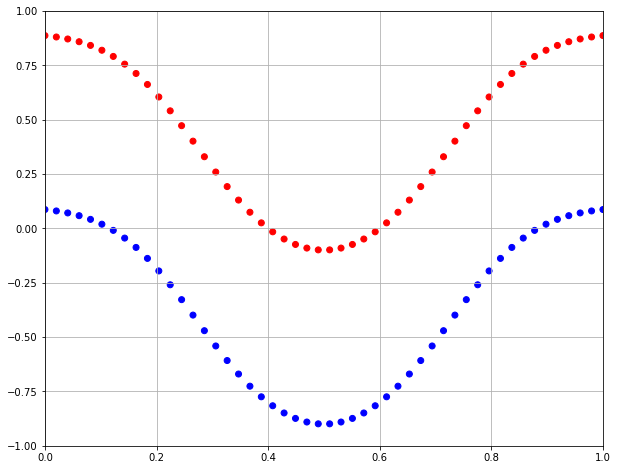

In [27]:
# generate data
from demo_datas import curve2d_data

inputs, outputs = curve2d_data()
colors = np.array(['b'] * len(outputs))
colors[outputs==1]='r'

ax = plt.subplot()
ax.scatter(inputs[:,0], inputs[:,1], c=colors)
ax.set_xlim([0.,1.])
ax.set_ylim([-1.,1.0])
ax.grid(True)

In [43]:
fcnn = FullyConnectedNN([2], learning_rate=1e-1)
batch_size = 10
epochs = 500
opt_w = fcnn.train(inputs[idx], outputs[idx], batch_size, epochs, print_every=500)

    0 iter loss =     0.6933 acc = 50.00
  500 iter loss =     0.3060 acc = 79.00
 1000 iter loss =     0.3068 acc = 77.00
 1500 iter loss =     0.3060 acc = 83.00
 2000 iter loss =     0.2944 acc = 85.00
 2500 iter loss =     0.2637 acc = 85.00
 3000 iter loss =     0.2178 acc = 91.00
 3500 iter loss =     0.1336 acc = 95.00
 4000 iter loss =     0.0549 acc = 100.00
 4500 iter loss =     0.0288 acc = 100.00
 4999 iter loss =     0.0186 acc = 100.00


## Circle data
This toy example is similar to the one from [convnetjs](http://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)

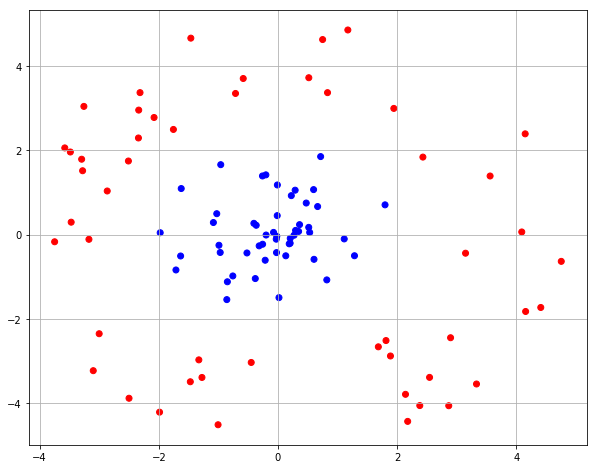

In [45]:
from demo_datas import cicle_data

inputs, outputs = cicle_data()
colors = np.array(['b'] * len(outputs))
colors[outputs==1]='r'

ax = plt.subplot()
ax.scatter(inputs[:,0], inputs[:,1], c=colors)
ax.grid(True)
idx = np.arange(len(inputs))
np.random.shuffle(idx)

In [46]:
from nn_fc_layers import FullyConnectedNN

fcnn = FullyConnectedNN([3], learning_rate=1e-1)
batch_size = 10
epochs = 200
opt_w = fcnn.train(inputs[idx], outputs[idx], batch_size, epochs, print_every=100)

    0 iter loss =     0.6933 acc = 50.00
  100 iter loss =     0.6941 acc = 50.00
  200 iter loss =     0.6938 acc = 50.00
  300 iter loss =     0.6934 acc = 68.00
  400 iter loss =     0.6920 acc = 45.00
  500 iter loss =     0.6960 acc = 50.00
  600 iter loss =     0.6920 acc = 36.00
  700 iter loss =     0.6909 acc = 72.00
  800 iter loss =     0.6630 acc = 71.00
  900 iter loss =     0.5513 acc = 71.00
 1000 iter loss =     0.3550 acc = 90.00
 1100 iter loss =     0.2928 acc = 93.00
 1200 iter loss =     0.2471 acc = 92.00
 1300 iter loss =     0.2155 acc = 93.00
 1400 iter loss =     0.1768 acc = 95.00
 1500 iter loss =     0.1386 acc = 96.00
 1600 iter loss =     0.1157 acc = 99.00
 1700 iter loss =     0.0956 acc = 100.00
 1800 iter loss =     0.0826 acc = 100.00
 1900 iter loss =     0.0751 acc = 100.00
 1999 iter loss =     0.0676 acc = 100.00
